In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 単回帰分析

### データの仕様
data1はランダムに生成したxの値からy=4+3x+$\epsilon$($\epsilon$はノイズ)なるyを計算したデータである.

In [2]:
df = pd.read_csv("data1.csv")
df.head()

,x,y
0,1.337552,7.673493
1,1.617263,8.340384
2,0.427299,3.920846
3,1.726479,7.997781
4,0.753139,6.558939


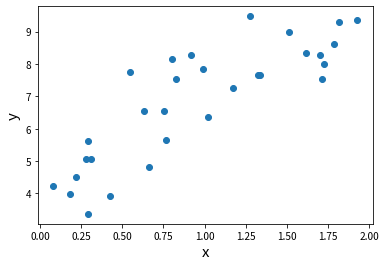

In [3]:
# データのプロット
plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.show()

### 正規方程式によるパラメータ計算

In [60]:
df["s"] = 1
X = df[["s","x"]].to_numpy()
y = df["y"].to_numpy()

In [66]:
T = np.linalg.inv(np.dot(X.T,X)) # Xの転置とXの積の逆行列を計算
np.dot(np.dot(T,X.T),y) # 先に計算した逆行列とXの転置とyの積を計算

array([4.30115189, 2.65088848])

### scikit-learnによる線形回帰

In [67]:
from sklearn.linear_model import LinearRegression

# numpy形式に変換
X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)
model = LinearRegression() # インスタンス化
model.fit(X,y) # フィッティング

LinearRegression()

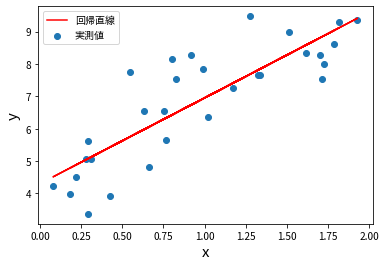

In [68]:
# 実測値と回帰直線のプロット
plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"],label="実測値")
plt.plot(df["x"],model.predict(X),c="r",label="回帰直線")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

### 性能評価

In [76]:
# 自由度調整済み決定係数
def adj_R_squared(n,k,R_squared):
    """
    Description of adj_R_squared
    
    This function calculate adjusted R-squared.
    
    Args : 
    n(int) : number of the data length
    k(int) : number of the parameter of model
    R_squared : R_squared values of the model
    
    Returns :
    adj_R_squared value(float)
    """
    return 1-(n-1)/(n-k-1)*(1-R_squared)

In [79]:
from sklearn.metrics import mean_squared_error

print("intercept : ",model.intercept_[0])
print("slope : ",model.coef_[0][0])
print("R2 score : ",model.score(X,y))
print("adj R2 score : ",adj_R_squared(X.shape[0],2,model.score(X,y)))
print("MSE : ",mean_squared_error(y,model.predict(X)))

intercept :  4.537584753061825
slope :  2.5148037342937726
R2 score :  0.7091291613061028
adj R2 score :  0.687583173254703
MSE :  0.9259403192677309


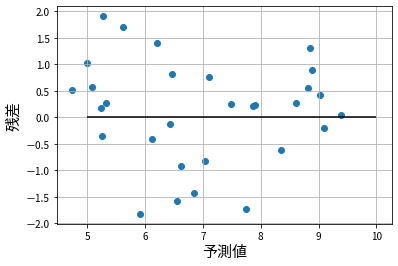

In [80]:
y_pred = model.predict(X)
resid = y_pred-y

plt.figure(facecolor="white")
plt.scatter(y_pred,resid)
plt.hlines(y = 0, xmin = 5, xmax = 10, color = 'black')
plt.xlabel("予測値",fontsize=15) # predicted value
plt.ylabel("残差",fontsize=15) # residuals
plt.grid()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


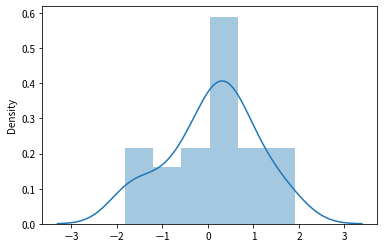

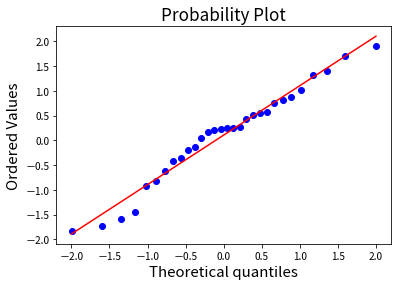

In [81]:
from scipy import stats

# カーネル密度
plt.figure(facecolor='white')
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid.reshape(1,-1)[0],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

## 重回帰分析

### データの仕様
データとしてWine Quality Data Setを用いる. 今回は赤ワインの成分に関する情報のうちdensityとvolatile acidityから, そのワインの品質quality(0～10)を予測する.

Reference : https://archive.ics.uci.edu/ml/datasets/wine+quality

In [158]:
df = pd.read_csv("data6.csv",sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [159]:
from sklearn.preprocessing import StandardScaler
# preprocessing

df["s"] = 1
X = df[["s","density","volatile acidity"]]
y = df[["quality"]]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[:,0] = 1

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

### 正規方程式によるパラメータ計算

In [161]:
T = np.linalg.inv(np.dot(X.T,X)) # Xの転置とXの積の逆行列を計算
np.dot(np.dot(T,X.T),y) # 先に計算した逆行列とXの転置とyの積を計算

array([[ 4.04168886e-15],
       [-1.66397440e-01],
       [-3.86892672e-01]])

### scikit-learnによる線形回帰

In [162]:
X = df[["density","volatile acidity"]]
y = df[["quality"]]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

In [150]:
model = LinearRegression() # インスタンス化
model.fit(X,y) # フィッティング

LinearRegression()

In [151]:
print("intercept : ",model.intercept_)
print("slope : ",model.coef_)
print("R2 score : ",model.score(X,y))
print("adj R2 score : ",adj_R_squared(X.shape[0],3,model.score(X,y)))
print("MSE : ",mean_squared_error(y,model.predict(X)))

intercept :  [4.08961201e-15]
slope :  [[-0.16639744 -0.38689267]]
R2 score :  0.18021005472982288
adj R2 score :  0.17866813006787274
MSE :  0.8197899452701772
